In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
data = pd.read_csv(r'C:\Users\piyal\Downloads\Housing.csv')
data.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df = data.copy()
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [31]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


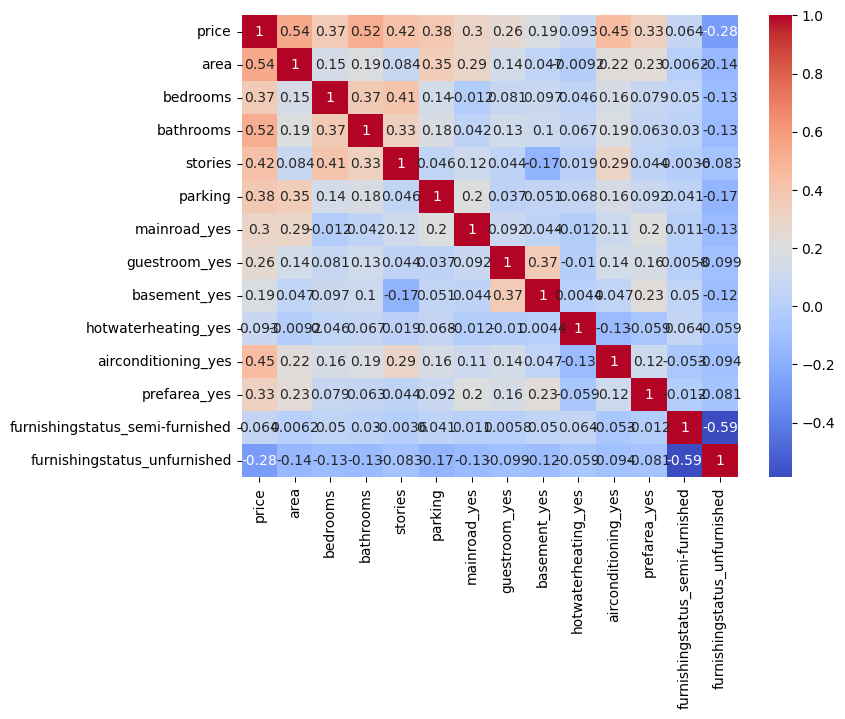

In [32]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [16]:
non_numeric_columns = df.select_dtypes(include = object).columns.to_list()
print()
print(non_numeric_columns)


['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [19]:
df = pd.get_dummies(df, columns = non_numeric_columns, drop_first= True, dtype = int)
df.head(20)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,1,0
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1


In [22]:
X = df.drop(columns = ['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
y_predict = model.predict(X_test_scaled)
df_predict = pd.DataFrame({'Actual_Value': y_test , 'Predicted_Value': y_predict})

df_predict.head(10)

,Actual_Value,Predicted_Value
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
209,4900000,3.532275e+06
176,5250000,5.611775e+06
249,4543000,6.368146e+06
516,2450000,2.722857e+06
426,3353000,2.629406e+06


In [29]:
mae = metrics.mean_absolute_error(y_test, y_predict)
rmse = metrics.root_mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)

print(f'meamean_absolute_error:{mae:.2f}')
print(f'rooroot_mean_squared_error:{rmse:.2f}')
print(f'r-squared value:{r2:.2f}')

meamean_absolute_error:970043.40
rooroot_mean_squared_error:1324506.96
r-squared value:0.65


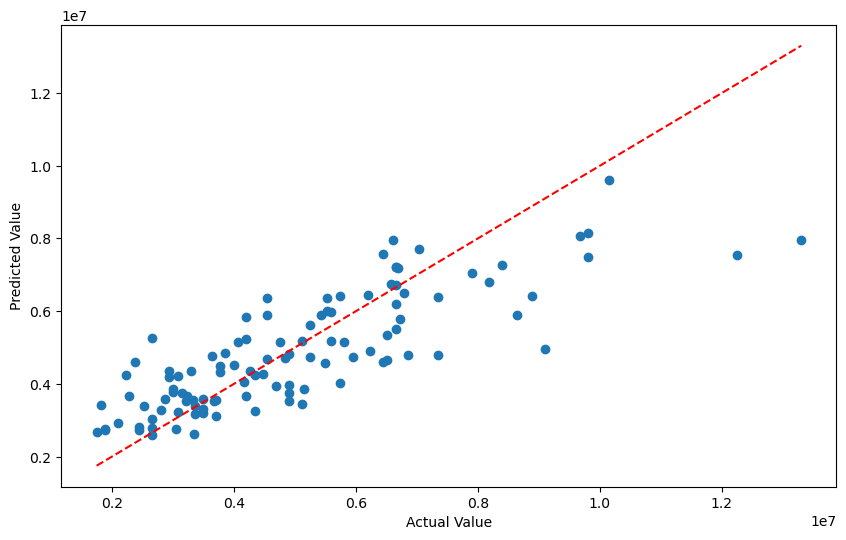

In [30]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [36]:
intercept = model.intercept_
coef = model.coef_
df_coef = pd.DataFrame({'Feature : X.columns, 'coefficient': coef})
print(f'intercept is: {intercept:.2f}')
print ('the coefficint are: ')
df_coef

SyntaxError: unterminated string literal (detected at line 3) (310565537.py, line 3)